In [1]:
from ultralytics import YOLO
import os
from PIL import Image
import matplotlib.pyplot as plt

/home/husan/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the model
model_path = "train/weights/best.pt"
model = YOLO(model_path)

In [3]:
# Directory of the validation dataset
val_dir = 'new_validation_set'
image_files = [os.path.join(val_dir, img) for img in os.listdir(val_dir) if img.endswith(('.JPG', '.png'))][:10]

In [4]:
metrics = model.val()  # evaluate model performance on the validation set
# results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image

Ultralytics YOLOv8.1.20 🚀 Python-3.10.12 torch-1.12.1+cu116 CPU (13th Gen Intel Core(TM) i7-1360P)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/husan/Agrobot/new_validation_set.cache... 1310 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1310/1310 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   9%|▊         | 7/82 [00:10<01:52,  1.49s/it]


KeyboardInterrupt: 


image 1/1 /home/husan/Agrobot/new_validation_set/IMG_1842_09.JPG: 288x640 4 maizes, 254.5ms
Speed: 76.0ms preprocess, 254.5ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 640)


AttributeError: 'list' object has no attribute 'pred'

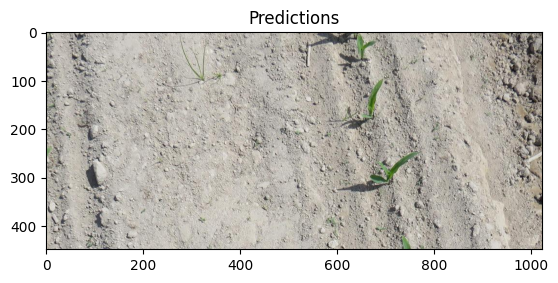

In [5]:
# Perform predictions and display results
for image_path in image_files:
    # Predictions
    results = model(image_path)

    # Alternatively, to display with matplotlib (uncomment if you prefer this method)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title('Predictions')
    for *box, conf, cls in results.pred[0]:
        x1, y1, x2, y2 = box
        plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], marker='o')
        plt.text(x1, y1, f'{model.names[int(cls)]} {conf:.2f}', color='red')
    plt.show()